# Projeto 3 - Ciência dos Dados

#### Stephanie Wertheimer, Thomas Pilnik e Victor Sznifer

Temos duas bases de dados: uma que fala sobre medições da quantidade de E. Coli nas praias de Chicago, e outra que mede diferentes características físicas da água. Nosso objetivo é buscar uma relação entre a proliferação de bactérias e os parâmetros utlizados para analisar a água. Faremos isso usando um modelo de regressão linear. Em seguida, faremos uma regressão logística que medirá a probabilidade de uma praia ser ou não própria para banho (fator regulado, por entre outros fatores, pela quantidade de E. Coli na água) de acordo com suas características físicas. 

In [160]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import math

In [161]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\steph\OneDrive\Documents\Engenharia Insper\2° semestre\Ciência dos Dados\Projeto_3


In [162]:
lab = pd.read_csv('Beach_Lab_Data.csv', sep=',')

In [163]:
lab.columns = ["DNATestID", "Timestamp", "Beach", "DNA1","DNA2", "DNAMean", "CultureTestID","Sample1TimeStamp","Sample1Reading","Sample2Reading","ReadingMean","CultureNote","SampleInterval","Sample2TimeStamp","Latitude","Longitude","Location"]

In [164]:
lab = pd.DataFrame(lab.loc[:, ["DNATestID", "Beach", "DNAMean","ReadingMean","Sample1TimeStamp"]]).dropna()

lab=lab.drop(lab[lab.Beach == 'Margaret T Burroughs'].index)
lab=lab.drop(lab[lab.Beach == 'Margaret T Burroughs'].index)
lab=lab.drop(lab[lab.Beach == 'South Shore'].index)
lab=lab.drop(lab[lab.Beach == '12th Street'].index)
lab=lab.drop(lab[lab.Beach == 'North Avenue'].index)
lab=lab.drop(lab[lab.Beach == 'Humboldt'].index)

lab.Beach.value_counts().sum()

449

In [165]:
lab.head()

,DNATestID,Beach,DNAMean,ReadingMean,Sample1TimeStamp
3376,1606.0,Montrose,79.7,844.0,08/05/2016 08:35:00 AM
3426,1670.0,Ohio Street,25.0,13.4,08/10/2016 03:42:00 PM
3447,724.0,Ohio Street,4.5,9.0,06/16/2016 07:03:00 AM
3449,183.0,Rainbow,279.0,241.8,07/28/2015 12:00:00 AM
3484,1891.0,Ohio Street,786.9,414.2,08/18/2016 08:30:00 AM


In [167]:
water = pd.read_csv('Beach_Water_Quality_-_Automated_Sensors.csv', sep=',')

water.columns = ["Beach", "Timestamp", "WtrTemperature", "Turbidity","TransducerDepth", "WaveHeight", "WavePeriod", "BatteryLife","TimestampLabel","ID"]

In [168]:
water=pd.DataFrame(water.loc[:, ["Beach", "WtrTemperature", "Turbidity","TransducerDepth", "WaveHeight", "WavePeriod", "TimestampLabel"]]).dropna()

water=water.drop(water[water.Beach == 'Osterman Beach'].index)

water['Nível']='Médio'
water.loc[(water.Beach == "Montrose Beach"), "Nível"] = "Montrose"
water.loc[(water.Beach == "Calumet Beach"), "Nível"] = "Calumet"
water.loc[(water.Beach == "Ohio Street Beach"), "Nível"] = "Ohio Street"
water.loc[(water.Beach == "Rainbow Beach"), "Nível"] = "Rainbow"
water.loc[(water.Beach == "63rd Street Beach"), "Nível"] = "63rd Street"

del water['Beach']


In [169]:
water_quality.head()

,WtrTemperature,Turbidity,TransducerDepth,WaveHeight,WavePeriod,TimestampLabel,Nível
0,20.3,1.18,0.891,0.080,3.0,8/30/2013 8:00 AM,Montrose
2,23.2,3.63,1.201,0.174,6.0,9/3/2013 4:00 PM,Calumet
3,16.2,1.26,1.514,0.147,4.0,5/28/2014 12:00 PM,Calumet
4,14.4,3.36,1.388,0.298,4.0,5/28/2014 12:00 PM,Montrose
5,14.5,2.72,1.395,0.306,3.0,5/28/2014 1:00 PM,Montrose


KeyError: 'WtrTemperature_water'

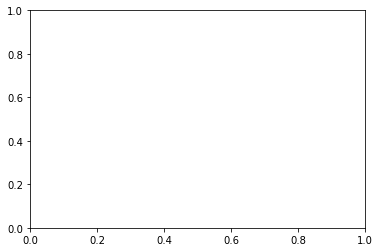

In [170]:
joined = lab.set_index('Beach').join(water.set_index('Nível'), how='inner', lsuffix='lab', rsuffix='_water')
joined

joined.plot.scatter('WtrTemperature_water','ReadingMean_lab');